In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('../data/loan_data_2007_2014.csv')

In [4]:
pd.options.display.max_columns = None
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
85293,7372265,9034154,3000,3000,3000.0,36 months,13.67,102.06,B,B5,Corporate Director of BD,1 year,OWN,150000.0,Source Verified,Oct-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 09/24/13 > New home improv...,home_improvement,Loan1,750xx,TX,14.06,0.0,Nov-96,4.0,29.0,NaN,12.0,0.0,15554,50.1,59.0,f,0.00,0.00,3211.229933,3211.23,3000.00,211.23,0.0,0.0,0.0,May-14,1599.03,NaN,May-14,0.0,29.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,321003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31075.0,NaN,NaN,NaN
33265,472112,596013,24500,24500,24450.0,36 months,11.83,811.79,B,B3,NaN,10+ years,OWN,150000.0,Not Verified,Dec-09,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,house,Down Payment,100xx,NY,13.42,0.0,Dec-77,0.0,NaN,NaN,10.0,0.0,346,0.7,16.0,f,0.00,0.00,24741.880000,24691.38,24500.00,241.88,0.0,0.0,0.0,Feb-10,24742.37,NaN,Feb-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387459,16121636,18224136,12000,12000,12000.0,36 months,12.49,401.39,B,B5,Academic Advisor/Program Coordinator,5 years,RENT,72000.0,Not Verified,May-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,104xx,NY,19.93,0.0,Dec-90,1.0,29.0,110.0,13.0,1.0,13963,58.7,35.0,f,6224.31,6224.31,7626.410000,7626.41,5775.69,1850.72,0.0,0.0,0.0,Dec-15,401.39,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,117273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23800.0,NaN,NaN,NaN
80069,7707227,9408978,21000,21000,21000.0,60 months,23.70,600.48,F,F1,Teacher,10+ years,RENT,108000.0,Verified,Oct-13,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,"All in one payment, better interest rate",853xx,AZ,17.40,0.0,Feb-92,0.0,39.0,NaN,16.0,0.0,17792,95.7,49.0,f,0.00,0.00,8104.440000,8104.44,3929.81,4174.63,0.0,0.0,0.0,Sep-14,600.48,NaN,Jan-16,0.0,39.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,134890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18600.0,NaN,NaN,NaN
282243,30746066,33299285,10250,10250,10250.0,60 months,20.99,277.24,E,E4,Legal assistant,10+ years,MORTGAGE,62000.0,Source Verified,Oct-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,919xx,CA,4.82,0.0,Aug-03,2.0,51.0,NaN,8.0,0.0,4531,42.0,40.0,w,0.00,0.00,1916.770000,1916.77,722.70,1194.07,0.0,0.0,0.0,May-15,277.24,NaN,Dec-15,0.0,51.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,305982.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10800.0,NaN,NaN,NaN
357186,20089656,22352255,18000,18000,18000.0,60 months,19.52,472.10,E,E2,NaN,NaN,MORTGAGE,61000.0,Verified,Jul-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,214xx,MD,8.44,0.0,May-92,1.0,36.0,51.0,11.0,1.0,3101,21.0,30.0,w,14285.17,14285.17,8497.800000,8497.80,3714.83,4782.97,0.0,0.0,0.0,Jan-16,472.10,Feb-16,Jan-16,0.0,39.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,312741.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14800.0,NaN,NaN,NaN
258802,34332444,36995737,16800,16800,1

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [14]:
# Get a list of columns that have more than 80% of the values missing
null_values = data.isnull().mean()
null_values[null_values > 0.8]

mths_since_last_record       0.865666
annual_inc_joint             1.000000
dti_joint                    1.000000
verification_status_joint    1.000000
open_acc_6m                  1.000000
open_il_6m                   1.000000
open_il_12m                  1.000000
open_il_24m                  1.000000
mths_since_rcnt_il           1.000000
total_bal_il                 1.000000
il_util                      1.000000
open_rv_12m                  1.000000
open_rv_24m                  1.000000
max_bal_bc                   1.000000
all_util                     1.000000
inq_fi                       1.000000
total_cu_tl                  1.000000
inq_last_12m                 1.000000
dtype: float64

In [18]:
data.mths_since_last_record.describe()

count    62638.000000
mean        74.306012
std         30.357653
min          0.000000
25%         53.000000
50%         76.000000
75%        102.000000
max        129.000000
Name: mths_since_last_record, dtype: float64

In [21]:
data.loan_status.value_counts() 

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [22]:
data.loan_status.value_counts(normalize=True)

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

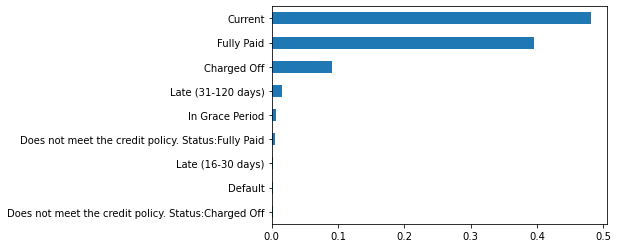

In [31]:
# Plot it as a bar chart
data.loan_status.value_counts(normalize=True).sort_values().plot(kind='barh')
plt.show()